## Pandas funções agregadas

### O Web scrapping ou "raspagem de dados"

In [25]:
import pandas as pd
import matplotlib as plt

In [18]:
url = 'https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/tabela/'
tabela_brasileirao = pd.read_html(url, encoding='utf-8')

tabela_brasileirao = tabela_brasileirao[0]

tabela_formatada = tabela_brasileirao.drop(columns=['Times','Times.1', 'Times.3'])
tabela_formatada.rename(columns={'Times.2': 'Times'}, inplace=True)
tabela_formatada.head()



,Times,P,J,V,E,D,GP,GC,SG,%
0,Botafogo >>,43,21,13,4,4,35,20,15,68
1,Flamengo >>,40,20,12,4,4,34,20,14,66
2,Fortaleza >>,39,20,11,6,3,26,19,7,65
3,Palmeiras >>,37,21,11,4,6,28,17,11,58
4,Cruzeiro >>,35,20,11,2,7,29,22,7,58


In [20]:
tabela_formatada[['Times', 'V']].head()

,Times,V
0,Botafogo >>,13
1,Flamengo >>,12
2,Fortaleza >>,11
3,Palmeiras >>,11
4,Cruzeiro >>,11


In [5]:
tabela_formatada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Times.2  20 non-null     object
 1   P        20 non-null     int64 
 2   J        20 non-null     int64 
 3   V        20 non-null     int64 
 4   E        20 non-null     int64 
 5   D        20 non-null     int64 
 6   GP       20 non-null     int64 
 7   GC       20 non-null     int64 
 8   SG       20 non-null     int64 
 9   %        20 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ KB


In [10]:
tabela_formatada.describe()

,P,J,V,E,D,GP,GC,SG,%
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,27.25000,19.800000,7.450000,4.900000,7.450000,24.000000,24.00000,0.000000,45.350000
std,8.57705,1.239694,3.051747,1.552587,2.723678,5.973626,5.30144,8.687559,13.468384
min,12.00000,16.000000,2.000000,2.000000,3.000000,14.000000,14.00000,-18.000000,19.000000
25%,21.00000,19.000000,5.000000,4.000000,5.750000,19.000000,20.00000,-6.500000,35.250000
50%,25.00000,20.000000,7.000000,5.000000,7.000000,23.500000,23.50000,0.000000,44.000000
75%,35.00000,21.000000,10.250000,6.000000,10.000000,28.250000,28.00000,7.000000,55.750000
max,43.00000,21.000000,13.000000,8.000000,13.000000,35.000000,35.00000,15.000000,68.000000


In [27]:
# Remover o sinal '>>' dos dados da coluna
tabela_formatada['Times'] = tabela_formatada['Times'] .str.replace('>>', '', regex=False).str.strip()
tabela_formatada.head()

grafico_percents = tabela_formatada.groupby('Times')['%'].sum().sort_values()

grafico_percents


Times
Atlético Goianiense    19
Cuiabá                 29
Corinthians            31
Fluminense             33
Vitória                33
Grêmio                 36
Juventude              38
Vasco da Gama          40
Criciúma               42
Internacional          43
Bragantino             45
Athletico-PR           49
Atlético-MG            49
Bahia                  50
São Paulo              55
Cruzeiro               58
Palmeiras              58
Fortaleza              65
Flamengo               66
Botafogo               68
Name: %, dtype: int64

<Axes: xlabel='Times'>

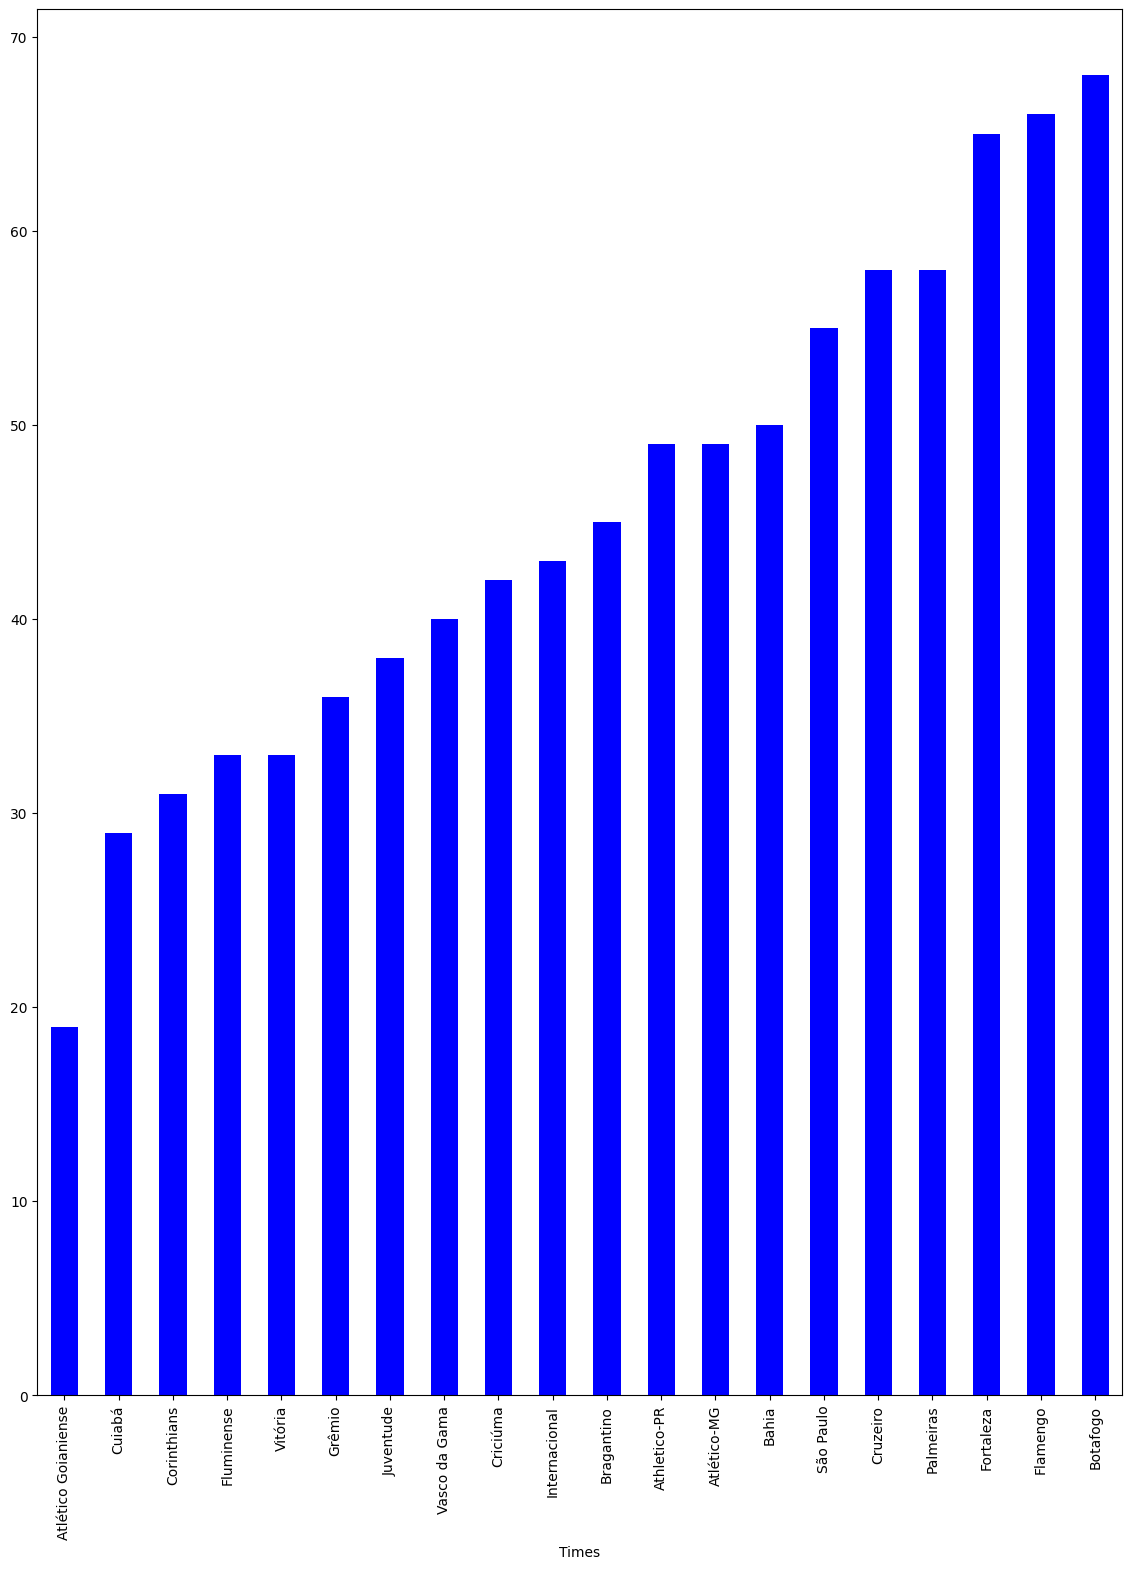

In [37]:

grafico_percents.plot(kind='bar', figsize=(14,18), color='blue')
